# <center> CCT College Dublin
# <center> Assessment Cover Page

<br><br><br>

### Module Title:
Statistical Techniques for Data Analysis Preparation

### Assessment Title:
CA1 Statistical Techniquesical Techniques 

### Student Details:
- **Full Name:**&nbsp;&nbsp;&nbsp; Yumiko Maria Bejarano Azogue  
- **Student Number:**&nbsp;&nbsp;&nbsp; 2024144  
- **Assessment Due Date:**&nbsp;&nbsp;&nbsp;21st April 2024
- **Date of Submission:**&nbsp;&nbsp;&nbsp;21st April 2024
    

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

```
<br><br><br>

# Observing and describing data

## Characterisation of the data set:

In [1]:
#Libraries and summary
import pandas as pd
import numpy as np

import statistics
import math
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot

# Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# Import thi slibrary to suppress the warnings
import warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
warnings.filterwarnings('ignore')  

In [3]:
# Loading the data into the data frame
df = pd.read_csv("Glassdoor Gender Pay Gap.csv") # df=dataframe


# Data Description: 
Begin by describing the dataset, including its size, structure, and variables. This involves examining the types of variables (numeric or categorical), their distributions, and any missing or erroneous values.

In [4]:
# To display the top 5 rows
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [5]:
# To display the bottom 5 rows
df.tail() 

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225
999,Financial Analyst,Male,60,1,PhD,Sales,2,123108,2244


In [6]:
# Print the dataset size
print("Dataset Size:", df.shape)

Dataset Size: (1000, 9)


In [7]:
# Print the data structure (data types of columns)
print('Datatype in Each Column\n')
pd.DataFrame({'Datatype': df.dtypes, 'Unique Values': df.nunique()}).rename_axis("Column Name")


Datatype in Each Column



,Datatype,Unique Values
Column Name,,
JobTitle,object,10
Gender,object,2
Age,int64,48
PerfEval,int64,5
Education,object,4
Dept,object,5
Seniority,int64,5
BasePay,int64,992
Bonus,int64,941


In [8]:
# Information about the dataframe
print("\nInformation about the dataframe:")
df.info()



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
df.nunique()

JobTitle      10
Gender         2
Age           48
PerfEval       5
Education      4
Dept           5
Seniority      5
BasePay      992
Bonus        941
dtype: int64

In [10]:
# Print descriptive statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,41.393,14.294856,18.0,29.00,41.0,54.25,65.0
PerfEval,1000.0,3.037,1.423959,1.0,2.00,3.0,4.00,5.0
Seniority,1000.0,2.971,1.395029,1.0,2.00,3.0,4.00,5.0
BasePay,1000.0,94472.653,25337.493272,34208.0,76850.25,93327.5,111558.00,179726.0
Bonus,1000.0,6467.161,2004.377365,1703.0,4849.50,6507.0,8026.00,11293.0


In [11]:
# Print the number of missing values in each column
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64


In [12]:
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


# Summary Statistics: 
Calculate descriptive statistics for numerical variables (e.g., mean, median, standard deviation) and frequency tables for categorical variables. 

This provides an initial understanding of the data's central tendencies and variability.


In [13]:
#  Statistical information of Dataframe
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
Age,1000.000000,41.393000,14.294856,18.000000,29.000000,41.000000,54.250000,65.000000
PerfEval,1000.000000,3.037000,1.423959,1.000000,2.000000,3.000000,4.000000,5.000000
Seniority,1000.000000,2.971000,1.395029,1.000000,2.000000,3.000000,4.000000,5.000000
BasePay,1000.000000,94472.653000,25337.493272,34208.000000,76850.250000,93327.500000,111558.000000,179726.000000
Bonus,1000.000000,6467.161000,2004.377365,1703.000000,4849.500000,6507.000000,8026.000000,11293.000000


In [14]:
# Summary Statistics
# Print descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:\n" )
df.describe()

Descriptive Statistics for Numerical Variables:



,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [15]:
# Identify categorical variables
print("Frequency Tables for Categorical Variables:\n")
df.describe(include=object).T


Frequency Tables for Categorical Variables:



,count,unique,top,freq
JobTitle,1000,10,Marketing Associate,118
Gender,1000,2,Male,532
Education,1000,4,High School,265
Dept,1000,5,Operations,210


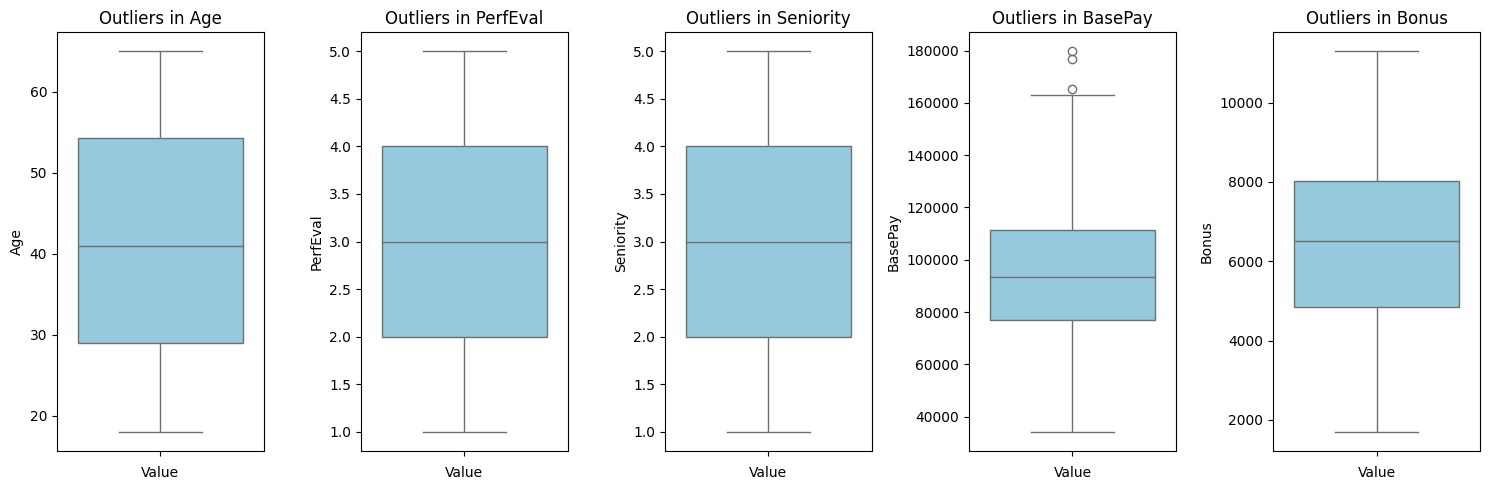

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Step 2: Calculate summary statistics
summary_stats = df.describe()

# Step 3: Define outlier criteria (example: based on quartiles)
Q1 = df[numeric_columns].quantile(0.10)
Q3 = df[numeric_columns].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = {}
for col in numeric_columns:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]

# Step 5: Optional Visualization
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i+1)
    sns.boxplot(y=df[col], color='skyblue')
    if col in outliers:
        sns.swarmplot(y=outliers[col], color='red')
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


In [17]:
# Step 6: Results Report
print("Outliers found in the following columns:")
for col, values in outliers.items():
    if not values.empty:
        print(f"- {col}: {len(values)} outliers")
    else:
        print(f"- {col}: No outliers found")
        
print("/--------------/")

for col, values in outliers.items():
    if len(values) > 0:
        print(f"Outliers in column {col}:")
        print(values)


Outliers found in the following columns:
- Age: No outliers found
- PerfEval: No outliers found
- Seniority: No outliers found
- BasePay: No outliers found
- Bonus: No outliers found
/--------------/


In [18]:
# Identify the indices of outliers in the BasePay column
outlier_indices = [969]

# Filter the DataFrame to show only rows with outliers in the BasePay column
outliers_df = df.loc[outlier_indices]

# Display the DataFrame with outliers in the BasePay column
print(outliers_df)

    JobTitle Gender  Age  PerfEval    Education        Dept  Seniority  \
969  Manager   Male   52         1  High School  Management          1   

     BasePay  Bonus  
969   110078   1703  


In [19]:
# Step 1: Identify numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Step 2: Calculate summary statistics
summary_stats = df.describe()

# Step 3: Define outlier criteria (example: based on quartiles)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 6: Results Report
print("Outliers found in the following columns:")
for col, values in outliers.items():
    if not values.empty:
        print(f"- {col}: {len(values)} outliers")
    else:
        print(f"- {col}: No outliers found")
        
print("/--------------/")

for col, values in outliers.items():
    if len(values) > 0:
        print(f"Outliers in column {col}:")
        print(values)


Outliers found in the following columns:
- Age: No outliers found
- PerfEval: No outliers found
- Seniority: No outliers found
- BasePay: No outliers found
- Bonus: No outliers found
/--------------/


# Pre-processing

# Handling Missing Values: 
Address any missing data by imputation or removal, depending on the extent and nature of the missingness.

In [20]:
# Handling Missing Values
# Drop rows with missing values
print("Missing Values:\n", df.isnull().sum().sum())

Missing Values:
 0


# Encoding Categorical Variables: 
Convert categorical variables into a numerical format suitable for analysis, such as one-hot encoding or label encoding.

In [21]:
# Encoding Categorical Variables
# Perform one-hot encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded=df
label_encoder = LabelEncoder()

for column in df.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column + '_Encoded'] = label_encoder.fit_transform(df[column])


df_encoded.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,JobTitle_Encoded,Gender_Encoded,Education_Encoded,Dept_Encoded
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,3,0,0,3
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,8,1,0,2
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,9,0,3,0
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,8,1,2,4
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,3,1,2,1


In [22]:
# Print the data structure (data types of columns)
print('Datatype in Each Column\n')
pd.DataFrame({'Datatype': df.dtypes, 'Unique Values': df.nunique()}).rename_axis("Column Name")

Datatype in Each Column



,Datatype,Unique Values
Column Name,,
JobTitle,object,10
Gender,object,2
Age,int64,48
PerfEval,int64,5
Education,object,4
Dept,object,5
Seniority,int64,5
BasePay,int64,992
Bonus,int64,941


# Variable: Salary 
The salary is calculated as sum of the base salary and the yearly bonus.

In [23]:
df_encoded['Salary'] = df_encoded['BasePay'] + df_encoded['Bonus']

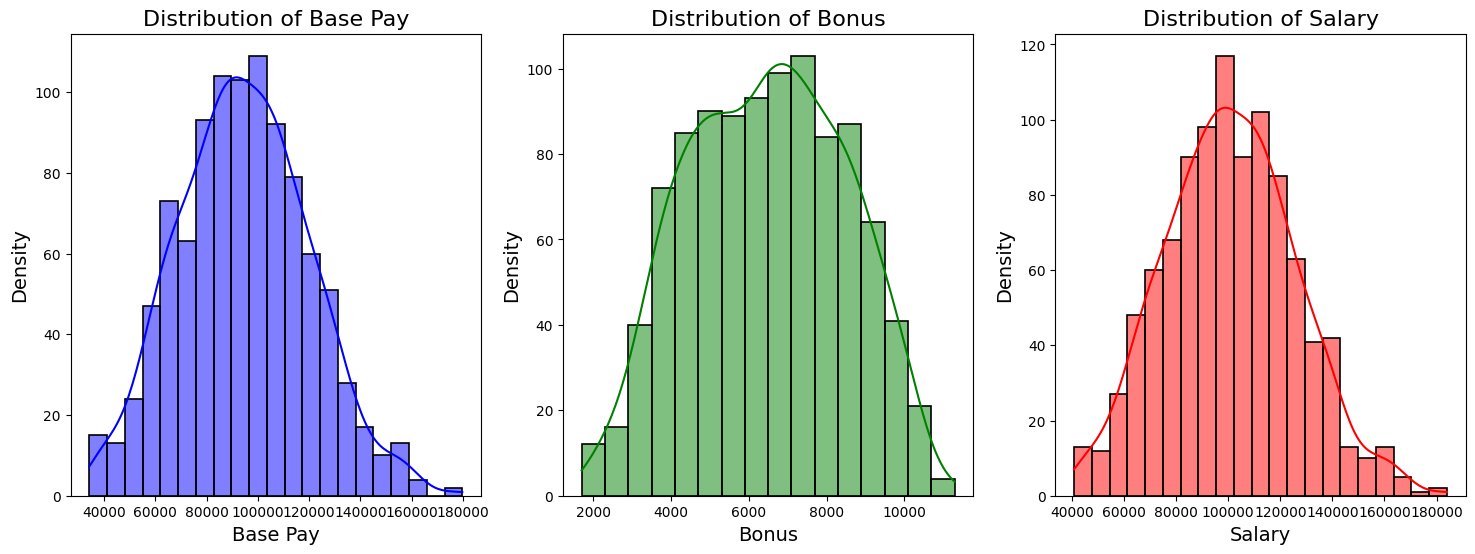

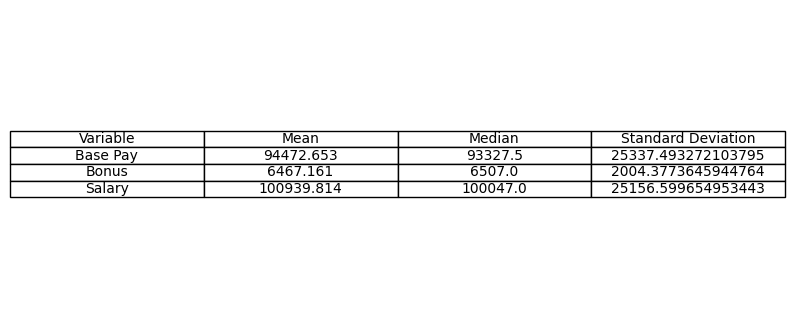

In [24]:
def target_var_visualized():
    plt.figure(figsize=(18,6))
    
    # Histograms
    plt.subplot(131)
    sns.histplot(data=df_encoded['BasePay'], kde=True, color='blue', edgecolor='black', linewidth=1.2)
    plt.xlabel('Base Pay', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of Base Pay', fontsize=16)
    
    plt.subplot(132)
    sns.histplot(data=df_encoded['Bonus'], kde=True, color='green', edgecolor='black', linewidth=1.2)
    plt.xlabel('Bonus', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of Bonus', fontsize=16)

    plt.subplot(133)
    sns.histplot(data=df_encoded['Salary'], kde=True, color='red', edgecolor='black', linewidth=1.2)
    plt.xlabel('Salary', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of Salary', fontsize=16)

    # Table
    plt.figure(figsize=(10, 4))
    ax = plt.gca()
    ax.axis('off')
    table_data = {
        'Variable': ['Base Pay', 'Bonus', 'Salary'],
        'Mean': [df_encoded['BasePay'].mean(), df_encoded['Bonus'].mean(), df_encoded['Salary'].mean()],
        'Median': [df_encoded['BasePay'].median(), df_encoded['Bonus'].median(), df_encoded['Salary'].median()],
        'Standard Deviation': [df_encoded['BasePay'].std(), df_encoded['Bonus'].std(), df_encoded['Salary'].std()]
    }
    df_table = pd.DataFrame(table_data)
    table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

target_var_visualized()


# Statistics Analysis

#  Mean

In [77]:
statistics.mean(df_encoded['Salary'])

100939.814

In [89]:
# Calculate the mean salary for males and females
male_mean_salary = df_encoded[df_encoded['Gender'] == 'Male']['Salary'].mean()
female_mean_salary = df_encoded[df_encoded['Gender'] == 'Female']['Salary'].mean()

# Calculate the overall mean salary
overall_mean_salary = df_encoded['Salary'].mean()

print(overall_mean_salary,",", male_mean_salary,",",female_mean_salary)

100939.814 , 104918.67857142857 , 96416.8311965812


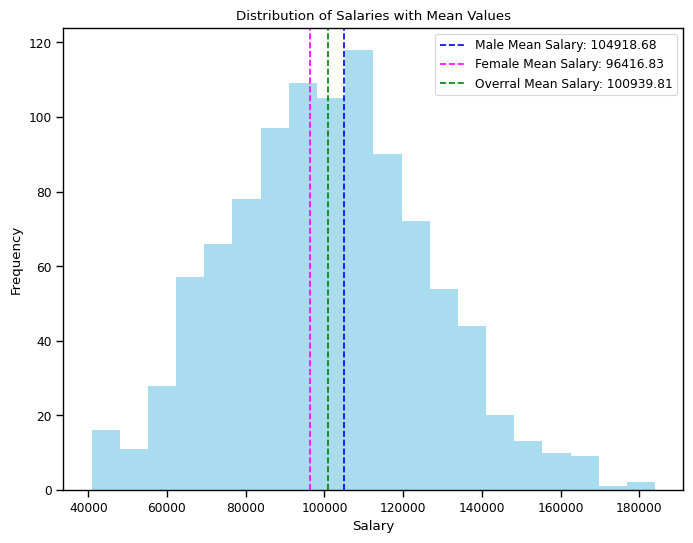

In [85]:
# Plot the histogram of salaries
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['Salary'], bins=20, color='skyblue', alpha=0.7)

# Add vertical lines for the mean salaries
plt.axvline(x=male_mean_salary, color='blue', linestyle='--', label=f'Male Mean Salary: {male_mean_salary:.2f}')
plt.axvline(x=female_mean_salary, color='magenta', linestyle='--', label=f'Female Mean Salary: {female_mean_salary:.2f}')

# Add vertical line for the overall median salary
plt.axvline(x=overall_mean_salary, color='green', linestyle='--', label=f'Overral Mean Salary: {overall_mean_salary:.2f}')

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries with Mean Values')
plt.legend()
plt.show()

# Median

In [27]:
statistics.median(df_encoded['Salary'])

100047.0

In [88]:
# Calculate the median salary for males and females
male_median_salary = df_encoded[df_encoded['Gender'] == 'Male']['Salary'].median()
female_median_salary = df_encoded[df_encoded['Gender'] == 'Female']['Salary'].median()

# Calculate the overall median salary
overall_median_salary = df_encoded['Salary'].median()

print(overall_median_salary,",", male_median_salary,",",female_median_salary)

100047.0 , 105100.5 , 96571.0


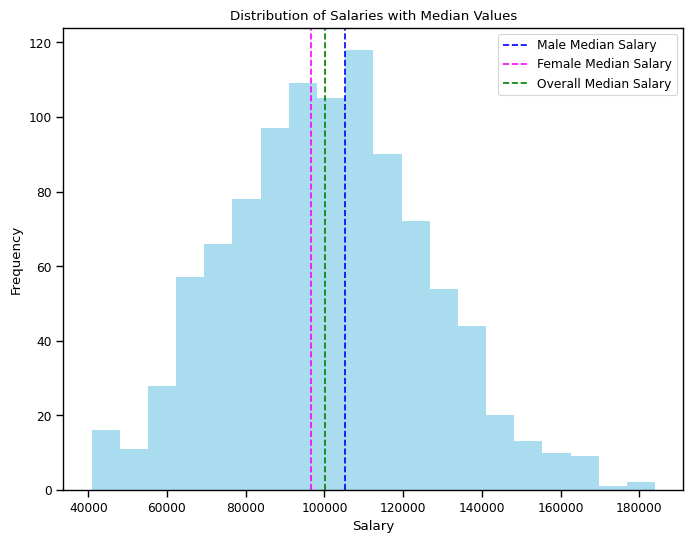

In [79]:
# Plot the histogram of salaries
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['Salary'], bins=20, color='skyblue', alpha=0.7)

# Add vertical lines for the median salaries
plt.axvline(x=male_median_salary, color='blue', linestyle='--', label='Male Median Salary')
plt.axvline(x=female_median_salary, color='magenta', linestyle='--', label='Female Median Salary')

# Add vertical line for the overall median salary
plt.axvline(x=overall_median_salary, color='green', linestyle='--', label='Overall Median Salary')

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries with Median Values')
plt.legend()

plt.show()


# Mode

In [29]:
int(stats.mode(df_encoded['Salary'])[0])

58373

In [90]:
# Calculate the mode salary for males and females
male_mode_salary = df_encoded[df_encoded['Gender'] == 'Male']['Salary'].mode()[0]
female_mode_salary = df_encoded[df_encoded['Gender'] == 'Female']['Salary'].mode()[0]

# Calculate the overall median salary
overall_mode_salary = df_encoded['Salary'].mode()[0]

print(overall_mode_salary,",", male_mode_salary,",",female_mode_salary)


58373 , 98578 , 83172


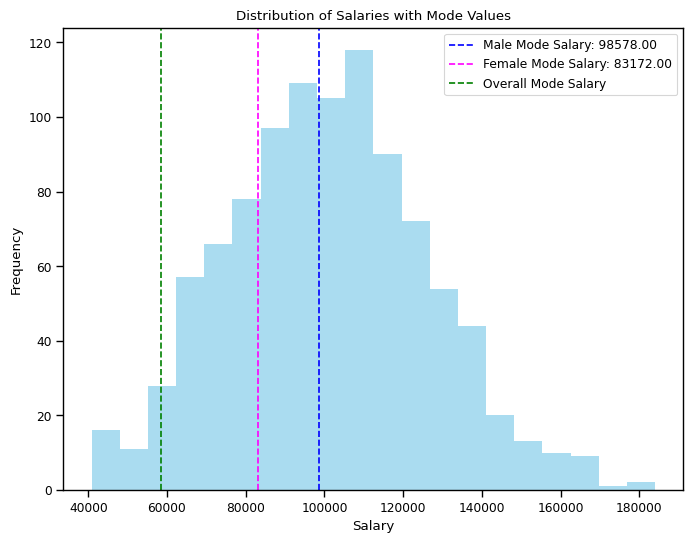

In [91]:

# Plot the histogram of salaries
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['Salary'], bins=20, color='skyblue', alpha=0.7)

# Add vertical lines for the mode salaries
plt.axvline(x=male_mode_salary, color='blue', linestyle='--', label=f'Male Mode Salary: {male_mode_salary:.2f}')
plt.axvline(x=female_mode_salary, color='magenta', linestyle='--', label=f'Female Mode Salary: {female_mode_salary:.2f}')

# Add vertical line for the overall median salary
plt.axvline(x=overall_mode_salary, color='green', linestyle='--', label='Overall Mode Salary')

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries with Mode Values')
plt.legend()
plt.show()


# Range

In [93]:
# Calculate range for each department
dept_ranges = df_encoded.groupby('Dept')['Salary'].apply(lambda x: x.max() - x.min())
dept_ranges

Dept
Administration    121237
Engineering       122139
Management        143052
Operations        115866
Sales             138840
Name: Salary, dtype: int64

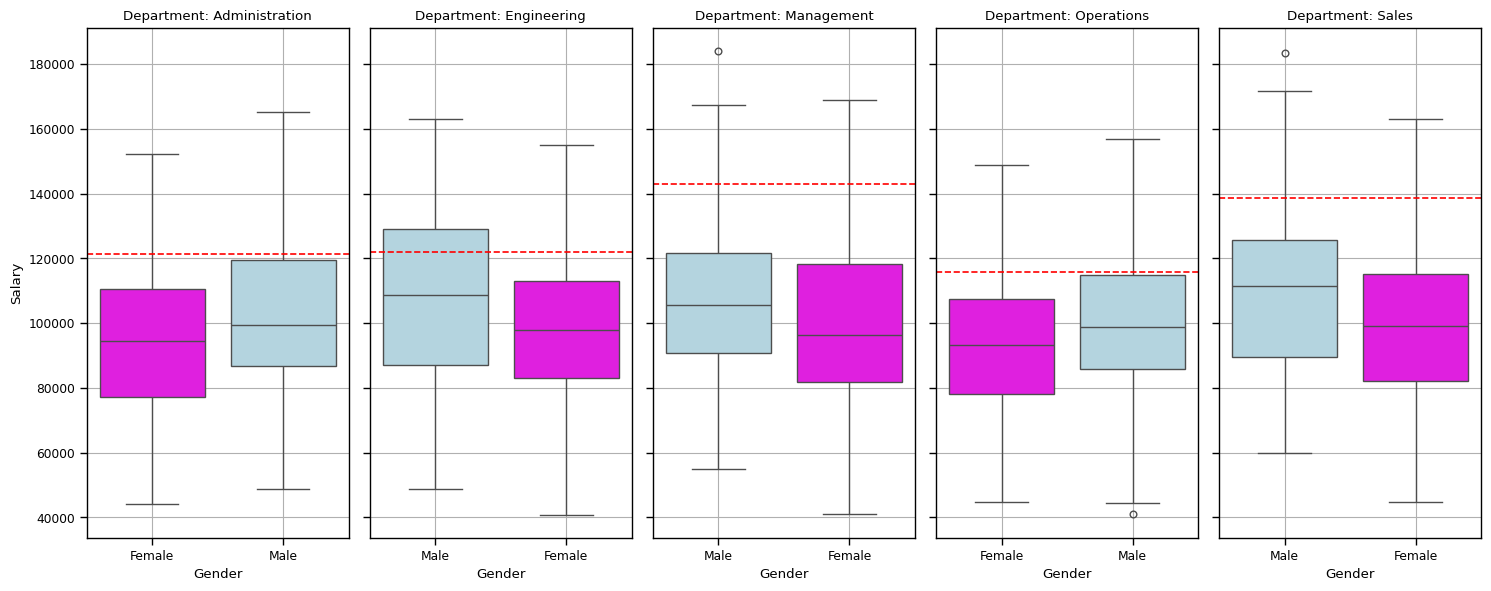

In [105]:
# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(dept_ranges), figsize=(15, 6), sharey=True)

# Loop through each department and plot boxplot
for i, (dept, r) in enumerate(dept_ranges.items()):
    sns.boxplot(ax=axes[i], data=df_encoded[df_encoded['Dept'] == dept], x='Gender', y='Salary',
                palette={'Male': 'lightblue', 'Female': 'magenta'})
    axes[i].axhline(y=r, color='red', linestyle='--', label=f'Range: {r:.2f}')
    axes[i].set_title(f'Department: {dept}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Salary')
    axes[i].grid(True)
    
    # Calculate median and IQR for each gender in the department
    male_data = df_encoded[(df_encoded['Dept'] == dept) & (df_encoded['Gender'] == 'Male')]['Salary']
    female_data = df_encoded[(df_encoded['Dept'] == dept) & (df_encoded['Gender'] == 'Female')]['Salary']
    median_male = male_data.median()
    q1_male, q3_male = np.percentile(male_data, [25, 75])
    iqr_male = q3_male - q1_male
    median_female = female_data.median()
    q1_female, q3_female = np.percentile(female_data, [25, 75])
    iqr_female = q3_female - q1_female
    
    # Add table with boxplot statistics
    table_data = [['Statistic', 'Male', 'Female'],
                  ['IQR', f'{iqr_male:.2f}', f'{iqr_female:.2f}']]
    print( dept,table_data)
    table = axes[i].table(cellText=table_data, cellLoc='center', loc='lower right', edges='open')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1)

plt.tight_layout()
plt.show()

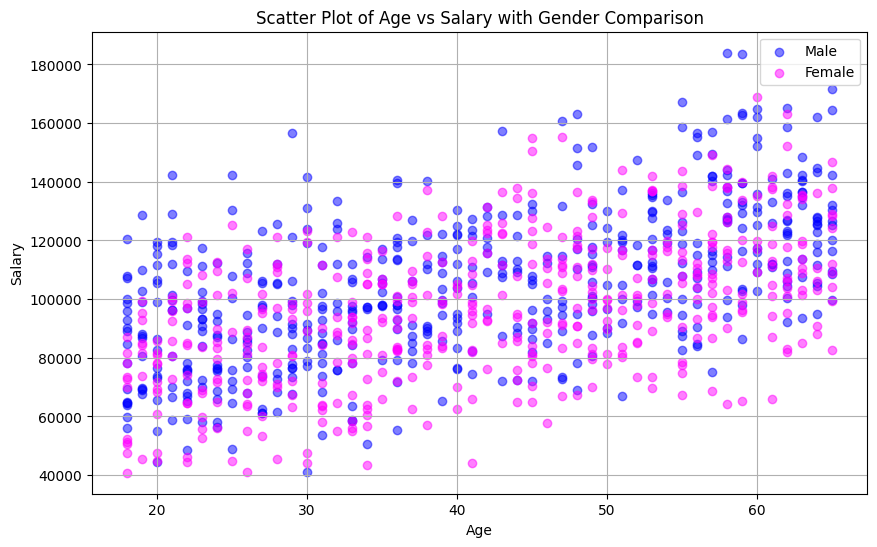

In [34]:
import matplotlib.pyplot as plt

# Scatter plot of ages and salaries with gender comparison
plt.figure(figsize=(10, 6))

# Scatter plot for male
plt.scatter(df_encoded[df_encoded['Gender'] == 'Male']['Age'], df_encoded[df_encoded['Gender'] == 'Male']['Salary'], color='blue', alpha=0.5, label='Male')

# Scatter plot for female
plt.scatter(df_encoded[df_encoded['Gender'] == 'Female']['Age'], df_encoded[df_encoded['Gender'] == 'Female']['Salary'], color='magenta', alpha=0.5, label='Female')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs Salary with Gender Comparison')
plt.legend()
plt.grid(True)
plt.show()



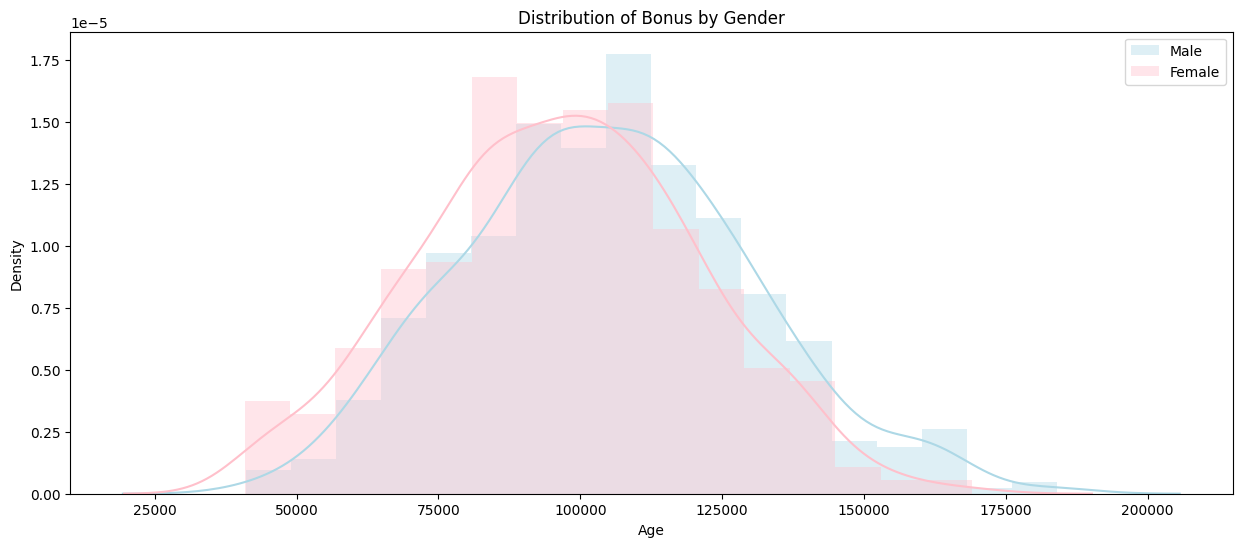

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.distplot(df_encoded[df_encoded['Gender'] == 'Male']['Salary'], color='lightblue', label='Male')
sns.distplot(df_encoded[df_encoded['Gender'] == 'Female']['Salary'], color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Bonus by Gender')
plt.legend()
plt.show()


# Standard deviation

In [36]:
statistics.stdev(df_encoded['Salary'])

25156.599654953443

In [37]:
# Calculate the standard deviation of salary for all data, males, and females
all_salary_std = df_encoded['Salary'].std()
male_salary_std = df_encoded[df_encoded['Gender'] == 'Male']['Salary'].std()
female_salary_std = df_encoded[df_encoded['Gender'] == 'Female']['Salary'].std()

print(all_salary_std,"-",male_salary_std,"-",female_salary_std)

25156.599654953443 - 25329.56663270108 - 24202.1574878287


Mean: 100939.814
Variance: 632221651.6934041
Standard Deviation: 25144.018208977737


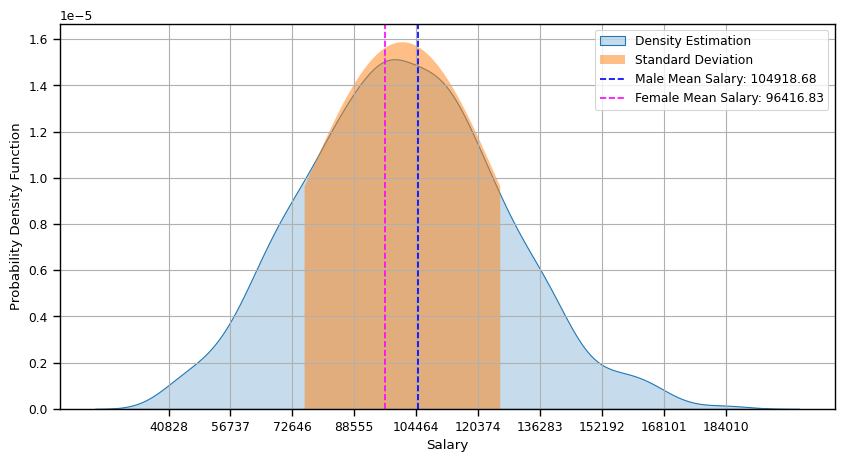

In [38]:
np.set_printoptions(linewidth=200)

sns.set_context("paper", font_scale=1)

# Distribution
X = df_encoded['Salary']
min_range = min(df_encoded['Salary'])
max_range = max(df_encoded['Salary'])

mean = np.mean(X)
var = np.var(X)
std = np.std(X)

print("Mean:", mean)
print("Variance:", var)
print("Standard Deviation:", std)

plt.figure(figsize=(10, 5))

ax = sns.kdeplot(X, shade=True, label='Density Estimation')

# Plot 1-std
x = np.linspace(mean - std, mean + std)
y = norm.pdf(x, mean, std)
ax.fill_between(x, y, alpha=0.5, label='Standard Deviation')

# Add vertical lines for the mean salaries
plt.axvline(x=male_mean_salary, color='blue', linestyle='--', label=f'Male Mean Salary: {male_mean_salary:.2f}')
plt.axvline(x=female_mean_salary, color='magenta', linestyle='--', label=f'Female Mean Salary: {female_mean_salary:.2f}')

plt.xlabel("Salary")
plt.ylabel("Probability Density Function")
plt.xticks(ticks=np.linspace(min_range, max_range, num=10))
plt.grid()
plt.legend()

plt.show()


# Normal Distribution

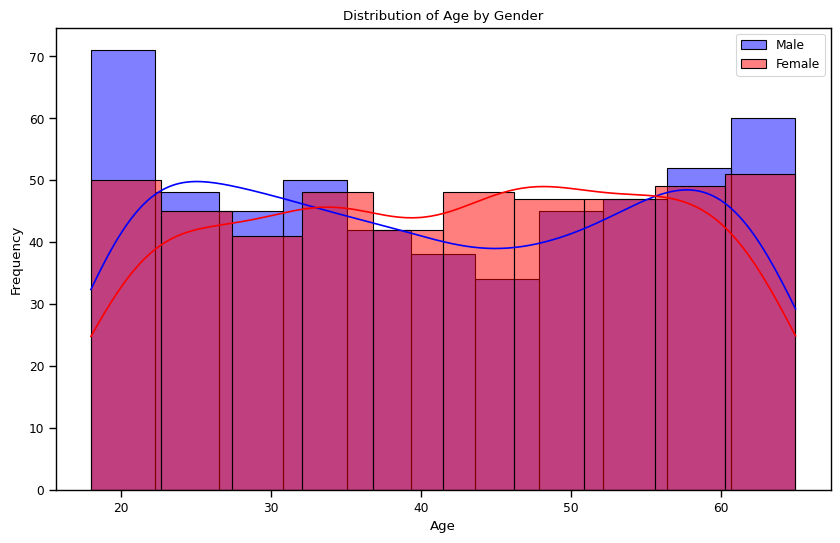

Shapiro-Wilk p-value for Male Group: 3.05062956974174e-14
Shapiro-Wilk p-value for Female Group: 6.630472372828701e-11
At least one group does not follow a normal distribution
Cannot perform t-test due to non-normal distribution of data.


In [39]:
import seaborn as sns
import scipy.stats as stats

# Step 1: Split the dataset by gender
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Step 2: Visualize age distributions
plt.figure(figsize=(10, 6))
sns.histplot(df_male['Age'], color='blue', kde=True, label='Male')
sns.histplot(df_female['Age'], color='red', kde=True, label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Gender')
plt.legend()
plt.show()

# Step 3: Normality tests
_, p_male = stats.shapiro(df_male['Age'])
_, p_female = stats.shapiro(df_female['Age'])

alpha = 0.05
print('Shapiro-Wilk p-value for Male Group:', p_male)
print('Shapiro-Wilk p-value for Female Group:', p_female)

if p_male > alpha and p_female > alpha:
    print('Both groups follow a normal distribution')
else:
    print('At least one group does not follow a normal distribution')

# Step 4: Mean comparison (if applicable)
if p_male > alpha and p_female > alpha:
    t_statistic, p_value = stats.ttest_ind(df_male['Age'], df_female['Age'])
    print('T-Test p-value:', p_value)
    if p_value < alpha:
        print('There is a statistically significant difference in the means of age between genders.')
    else:
        print('There is no statistically significant difference in the means of age between genders.')
else:
    print('Cannot perform t-test due to non-normal distribution of data.')


In [40]:
import scipy.stats as stats

# Perform Shapiro-Wilk test for normality
_, p_male = stats.shapiro(df_male['Age'])
_, p_female = stats.shapiro(df_female['Age'])

alpha = 0.05

print('Shapiro-Wilk p-value for Male Group:', p_male)
print('Shapiro-Wilk p-value for Female Group:', p_female)

if p_male < alpha:
    print('Male group does not follow a normal distribution')
else:
    print('Male group follows a normal distribution')

if p_female < alpha:
    print('Female group does not follow a normal distribution')
else:
    print('Female group follows a normal distribution')


Shapiro-Wilk p-value for Male Group: 3.05062956974174e-14
Shapiro-Wilk p-value for Female Group: 6.630472372828701e-11
Male group does not follow a normal distribution
Female group does not follow a normal distribution


# EDA

In [41]:
# List of categorical variables you want to remove
categorical_variables = ['JobTitle', 'Gender', 'Education', 'Dept']

# Remove the categorical variables from the DataFrame
data= df.drop(categorical_variables, axis=1)




In [42]:
c= data.corr()
c

,Age,PerfEval,Seniority,BasePay,Bonus,JobTitle_Encoded,Gender_Encoded,Education_Encoded,Dept_Encoded,Salary
Age,1.000000,-0.056875,-0.021414,0.562681,-0.414337,-0.017228,-0.028625,0.019744,0.047261,0.533715
PerfEval,-0.056875,1.000000,-0.021127,-0.053622,0.855500,-0.007299,0.066627,0.027383,-0.000349,0.014155
Seniority,-0.021414,-0.021127,1.000000,0.511096,0.194982,0.005238,-0.028131,0.016470,-0.081988,0.530307
BasePay,0.562681,-0.053622,0.511096,1.000000,-0.129481,0.046422,0.167766,0.141525,0.030913,0.996874
Bonus,-0.414337,0.855500,0.194982,-0.129481,1.000000,0.044208,-0.003208,0.053530,-0.065126,-0.050736
JobTitle_Encoded,-0.017228,-0.007299,0.005238,0.046422,0.044208,1.000000,0.068547,-0.017183,-0.007427,0.050278
Gender_Encoded,-0.028625,0.066627,-0.028131,0.167766,-0.003208,0.068547,1.000000,0.061612,0.003583,0.168716
Education_Encoded,0.019744,0.027383,0.016470,0.141525,0.053530,-0.017183,0.061612,1.000000,0.000266,0.146808
Dept_Encoded,0.047261,-0.000349,-0.081988,0.030913,-0.065126,-0.007427,0.003583,0.000266,1.000000,0.025946
Salary,0.533715,0.014155,0.530307,0.996874,-0.050736,0.050278,0.168716,0.146808,0.025946,1.000000


<Axes: >

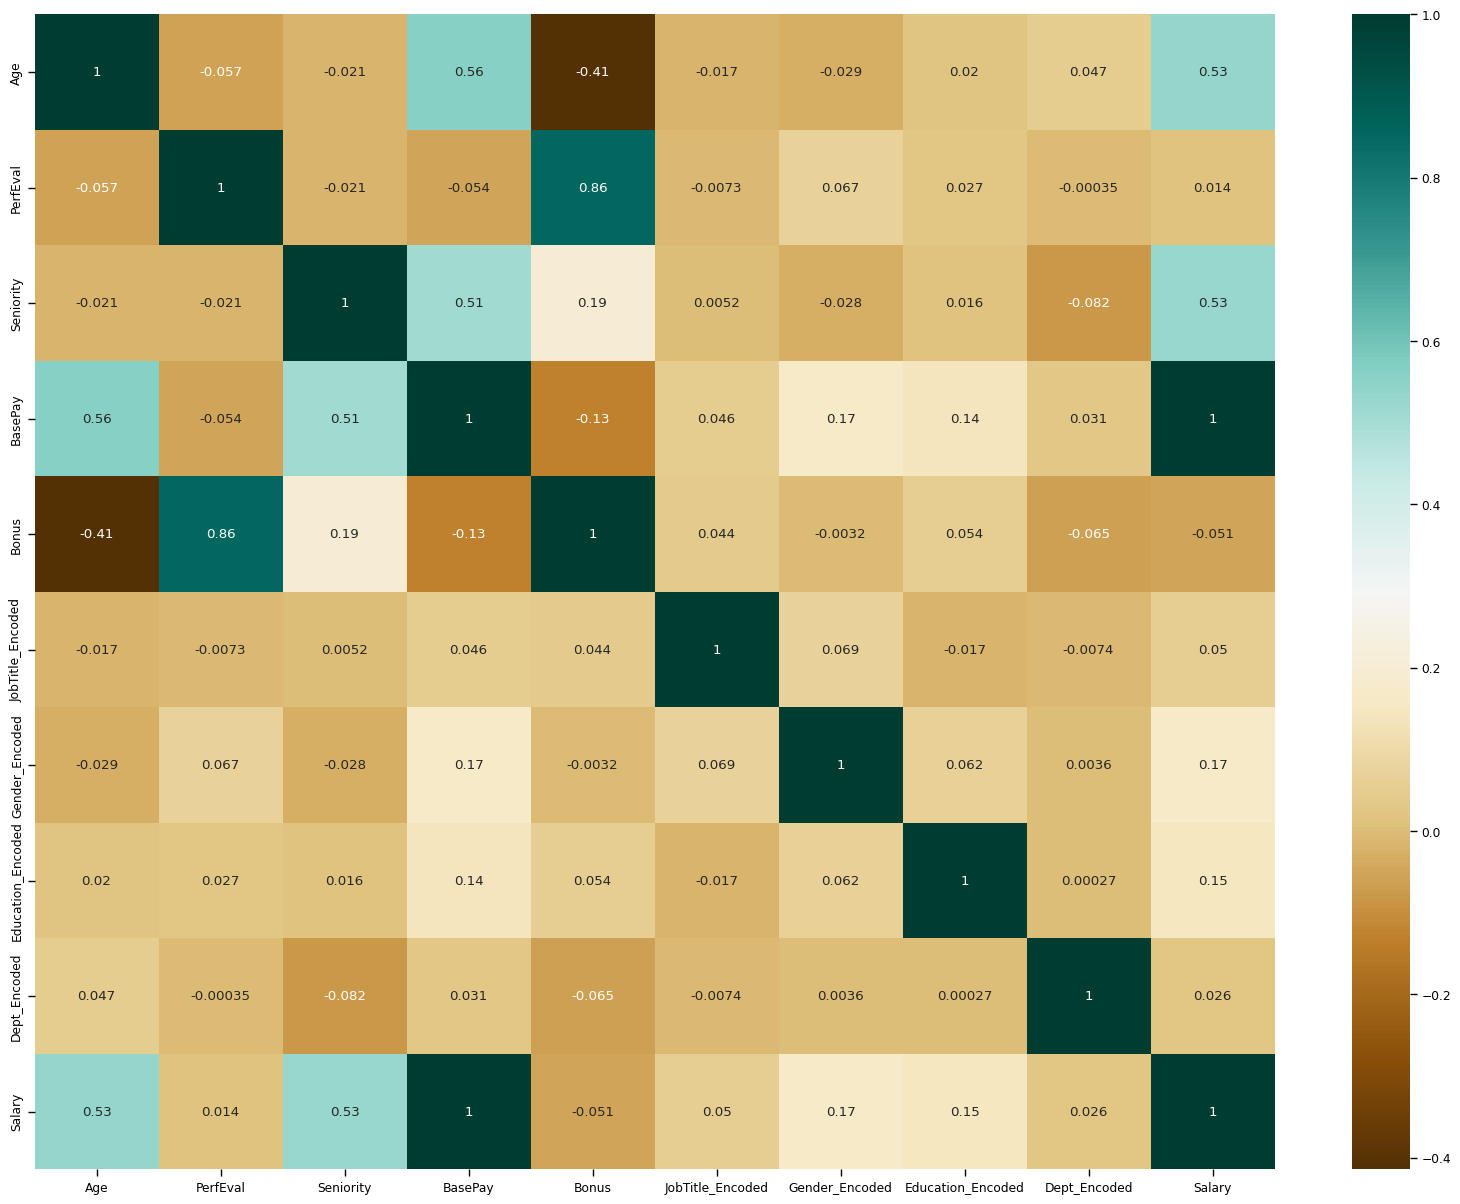

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(c,cmap="BrBG",annot=True)

In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers for each column and count the total number
outliers_total = (data < lower_bound) | (data > upper_bound)
outliers_count = outliers_total.sum()

# Display the total outliers found for each column
print("Total outliers in each column:")
outliers_count


Total outliers in each column:


Age                  0
PerfEval             0
Seniority            0
BasePay              3
Bonus                0
JobTitle_Encoded     0
Gender_Encoded       0
Education_Encoded    0
Dept_Encoded         0
Salary               3
dtype: int64

In [45]:
# Create a copy of outliers_count to keep the original intact
outliers = outliers_count.copy()

# Remove columns that have no outliers
outliers = outliers[outliers > 0]

# Show the total outliers for columns that have outliers
print("Total outliers in each column:")
outliers


Total outliers in each column:


BasePay    3
Salary     3
dtype: int64

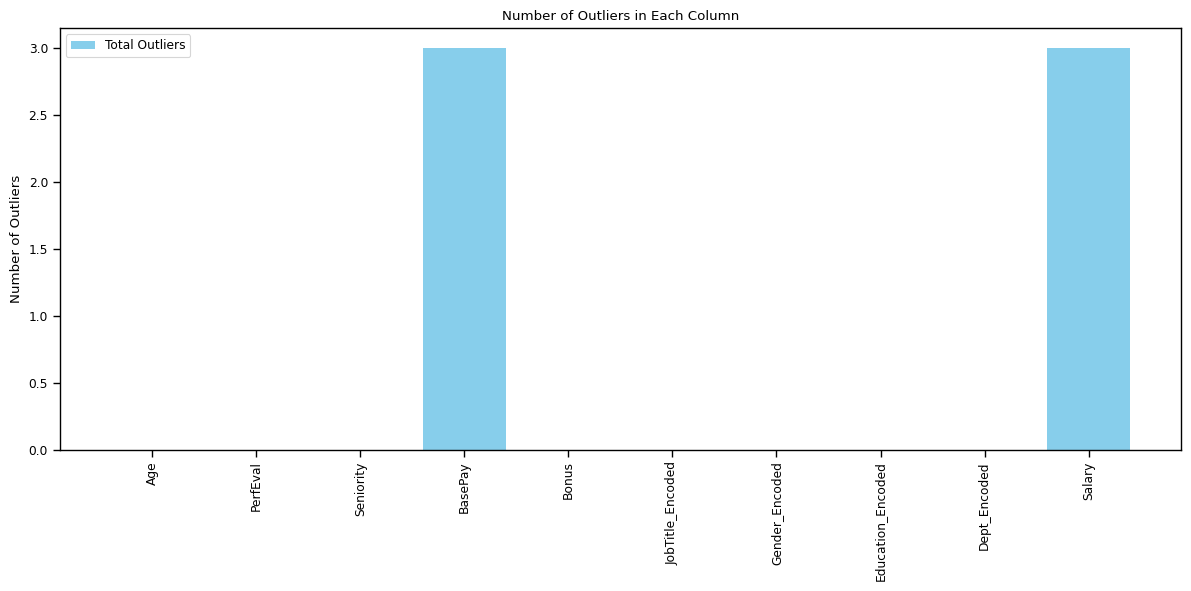

In [46]:
plt.figure(figsize=(12, 6))

plt.bar(outliers_count.index, outliers_count.values, color='skyblue', label='Total Outliers')

# Agregar título y etiquetas
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Removing Outliers from DataFrame

Remove outliers from each column of the DataFrame, keeping only those that fall below the 95th percentile in each column

In [47]:
percentage_to_keep = 0.95

# Crea una lista para almacenar los DataFrames filtrados
filtered_data_frames = []

# Itera sobre todas las columnas excepto 'Target'
for column in data.columns:
        # Calcula el valor del percentil para la columna actual
        outlier = data[column].quantile(percentage_to_keep)
        # Filtra los datos manteniendo solo aquellos por debajo del percentil
        filtered_data_frames.append(data[data[column] < outlier])

# Concatena todos los DataFrames filtrados en uno solo
filtered_data = pd.concat(filtered_data_frames)


In [48]:
filtered_data

,Age,PerfEval,Seniority,BasePay,Bonus,JobTitle_Encoded,Gender_Encoded,Education_Encoded,Dept_Encoded,Salary
0,18,5,2,42363,9938,3,0,0,3,52301
1,21,5,5,108476,11128,8,1,0,2,119604
2,19,4,5,90208,9268,9,0,3,0,99476
3,20,5,4,108080,10154,8,1,2,4,118234
4,26,5,5,99464,9319,3,1,2,1,108783
...,...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,3270,6,0,1,0,65914
996,57,1,2,108977,3567,0,1,2,4,112544
997,48,1,1,92347,2724,2,1,1,3,95071
998,65,2,1,97376,2225,2,1,1,0,99601


# Principal Component Analysis PCA

In [49]:
# Removes the "Target" column from the final_data_df DataFrame.
data_no_label = filtered_data.drop('Gender_Encoded',axis=1)
data_no_label
#filtered_data 

,Age,PerfEval,Seniority,BasePay,Bonus,JobTitle_Encoded,Education_Encoded,Dept_Encoded,Salary
0,18,5,2,42363,9938,3,0,3,52301
1,21,5,5,108476,11128,8,0,2,119604
2,19,4,5,90208,9268,9,3,0,99476
3,20,5,4,108080,10154,8,2,4,118234
4,26,5,5,99464,9319,3,2,1,108783
...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,3270,6,1,0,65914
996,57,1,2,108977,3567,0,2,4,112544
997,48,1,1,92347,2724,2,1,3,95071
998,65,2,1,97376,2225,2,1,0,99601


In [50]:
#Computes the explained variance ratios for each principal component using PCA.

In [51]:
# Realizar el PCA
pca = PCA()
pca = PCA().fit(data_no_label)
pca.explained_variance_ratio_

array([9.95229802e-01, 4.77009311e-03, 9.48331386e-08, 6.67800708e-09, 1.64851744e-09, 1.05458401e-09, 8.42751074e-10, 1.76930281e-10, 6.86668233e-33])

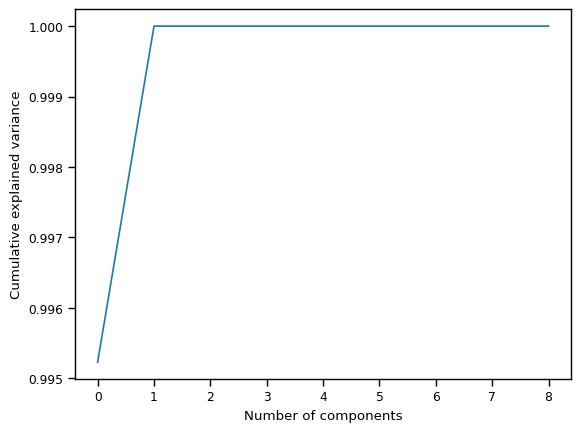

In [52]:
#Cumulative explained variance against the number of principal components.
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance'); 

In [53]:
# PCA dimensionality reduction keeping only the principal components.

In [54]:
pca = PCA()
projected = pca.fit_transform(data_no_label)
projected

array([[-6.88931344e+04,  3.89143834e+03, -5.13429262e-01, ..., -7.82926835e-01,  1.43912242e-01,  1.58574662e-10],
       [ 2.54339886e+04,  5.99676026e+03,  1.29260674e+01, ..., -9.28496767e-01,  2.72529843e-01,  7.31439249e-11],
       [-1.69979849e+03,  3.53233240e+03,  1.42873712e+01, ...,  1.59611130e+00, -4.47407061e-01, -9.67160691e-11],
       ...,
       [-3.24701710e+03, -4.49325885e+03,  2.04033822e+00, ..., -1.09695512e+00,  5.71679076e-02,  4.96840865e-13],
       [ 3.51625788e+03, -5.05800453e+03, -1.22785137e+01, ..., -1.23862676e+00, -7.52609460e-01, -5.36635217e-13],
       [ 3.99192160e+04, -4.78470340e+03,  2.33004637e-01, ...,  4.56717102e-01, -1.70323395e-01,  1.61306369e-12]])

In [55]:
# Dimensions of the array
projected.shape

(8316, 9)

In [56]:
# DataFrame with data projected onto the principal components
data_pca = pd.DataFrame(projected,)
data_pca

,0,1,2,3,4,5,6,7,8
0,-68893.134385,3891.438337,-0.513429,-1.320801,-1.108606,-1.039829,-0.782927,0.143912,1.585747e-10
1,25433.988646,5996.760256,12.926067,3.182602,-0.023947,-1.516040,-0.928497,0.272530,7.314392e-11
2,-1699.798485,3532.332402,14.287371,4.278677,2.022703,0.514229,1.596111,-0.447407,-9.671607e-11
3,24193.459576,4795.315466,16.188229,3.166717,-2.246809,0.309137,-0.018201,-0.274807,9.879119e-11
4,11425.487406,3684.926942,9.743991,-1.712382,1.009839,-0.185712,0.635370,-0.895751,5.459490e-11
...,...,...,...,...,...,...,...,...,...
8311,-44870.929230,-4110.440138,-20.867521,2.130793,2.191041,-0.028676,0.184789,0.717543,3.357471e-12
8312,20859.787789,-3295.227901,-4.175398,-4.281564,-1.953023,0.537163,0.187921,0.780766,-5.904592e-13
8313,-3247.017104,-4493.258846,2.040338,-2.225701,-1.117804,0.585771,-1.096955,0.057168,4.968409e-13
8314,3516.257877,-5058.004528,-12.278514,-2.078771,1.887501,0.884363,-1.238627,-0.752609,-5.366352e-13


In [57]:
#Adds the "Target" column from the original DataFrame to the projected data DataFrame.
data_pca["Gender"] = filtered_data ["Gender_Encoded"].values
data_pca

,0,1,2,3,4,5,6,7,8,Gender
0,-68893.134385,3891.438337,-0.513429,-1.320801,-1.108606,-1.039829,-0.782927,0.143912,1.585747e-10,0
1,25433.988646,5996.760256,12.926067,3.182602,-0.023947,-1.516040,-0.928497,0.272530,7.314392e-11,1
2,-1699.798485,3532.332402,14.287371,4.278677,2.022703,0.514229,1.596111,-0.447407,-9.671607e-11,0
3,24193.459576,4795.315466,16.188229,3.166717,-2.246809,0.309137,-0.018201,-0.274807,9.879119e-11,1
4,11425.487406,3684.926942,9.743991,-1.712382,1.009839,-0.185712,0.635370,-0.895751,5.459490e-11,1
...,...,...,...,...,...,...,...,...,...,...
8311,-44870.929230,-4110.440138,-20.867521,2.130793,2.191041,-0.028676,0.184789,0.717543,3.357471e-12,0
8312,20859.787789,-3295.227901,-4.175398,-4.281564,-1.953023,0.537163,0.187921,0.780766,-5.904592e-13,1
8313,-3247.017104,-4493.258846,2.040338,-2.225701,-1.117804,0.585771,-1.096955,0.057168,4.968409e-13,1
8314,3516.257877,-5058.004528,-12.278514,-2.078771,1.887501,0.884363,-1.238627,-0.752609,-5.366352e-13,1


In [58]:
# Converts the DataFrame into a numpy array
data_array = data_pca.values
data_array

array([[-6.88931344e+04,  3.89143834e+03, -5.13429262e-01, ...,  1.43912242e-01,  1.58574662e-10,  0.00000000e+00],
       [ 2.54339886e+04,  5.99676026e+03,  1.29260674e+01, ...,  2.72529843e-01,  7.31439249e-11,  1.00000000e+00],
       [-1.69979849e+03,  3.53233240e+03,  1.42873712e+01, ..., -4.47407061e-01, -9.67160691e-11,  0.00000000e+00],
       ...,
       [-3.24701710e+03, -4.49325885e+03,  2.04033822e+00, ...,  5.71679076e-02,  4.96840865e-13,  1.00000000e+00],
       [ 3.51625788e+03, -5.05800453e+03, -1.22785137e+01, ..., -7.52609460e-01, -5.36635217e-13,  1.00000000e+00],
       [ 3.99192160e+04, -4.78470340e+03,  2.33004637e-01, ..., -1.70323395e-01,  1.61306369e-12,  1.00000000e+00]])

In [59]:
#Defines predictor variables (X) and the target variable (y) for modeling and Splits the data into training and test sets
X = data_array[:,0:9]
y = data_array[:,9]

In [60]:
X_train, X_validation, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [61]:
# Initializes a list of classification models to evaluate their performance
models = []
#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models

[('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB())]

In [62]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.688816 (0.011292)
KNN: 0.985719 (0.002908)
CART: 1.000000 (0.000000)
NB: 0.632137 (0.013685)


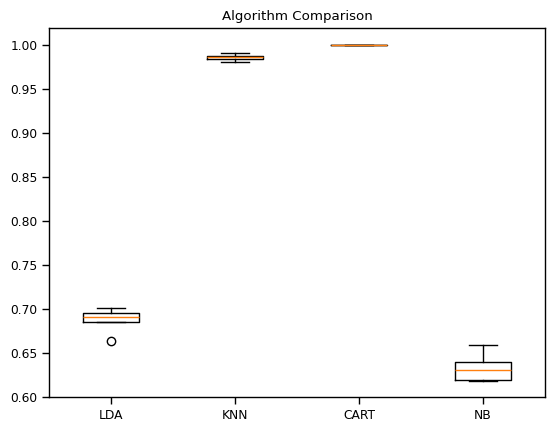

In [63]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [64]:
# PCA for Dimensionality Reduction

In [65]:
#Initialize and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
predictions = model.predict(X_validation)
print("Predictions:")
predictions

Predictions:


array([1., 1., 1., ..., 1., 1., 0.])

In [67]:
accuracy=accuracy_score(y_test, predictions)
print("Accuracy score:")
accuracy

Accuracy score:


1.0

In [68]:
confusion_mtx = confusion_matrix(y_test, predictions)

print("Confusion Matrix")
confusion_mtx

Confusion Matrix


array([[840,   0],
       [  0, 824]], dtype=int64)

In [69]:
# Get the shape of the confusion matrix
rows, columns = confusion_mtx.shape

# Print the shape
print("Shape of the Confusion Matrix:", rows, "x", columns)

Shape of the Confusion Matrix: 2 x 2


In [70]:
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(confusion_mtx)

Accuracy Score: 1.0
Confusion Matrix:
[[840   0]
 [  0 824]]


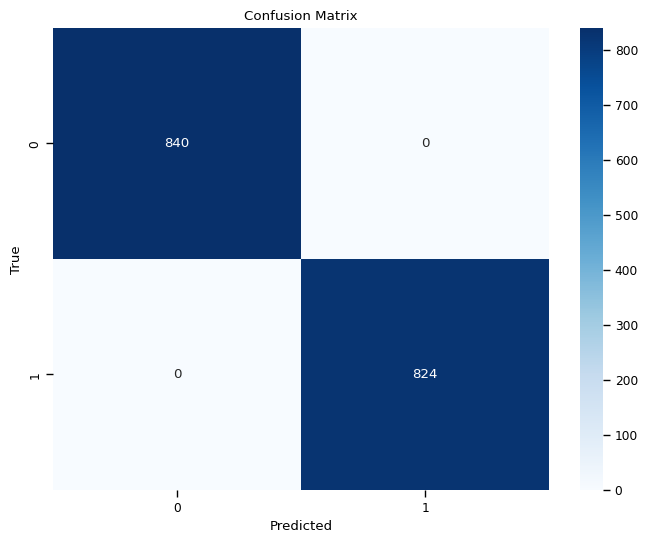

In [75]:
#Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [72]:
sdf

NameError: name 'sdf' is not defined

# Task 2 - Probability (Discrete):

## What is the probability of rolling exactly two 6s in five rolls of a fair die?

### Calculating the Probability of Exactly Two 6s:
Use the stats.binom.pmf(k, n, p) function to calculate the probability of exactly k successes (in this case, two 6s) in n trials (five rolls of a fair die), where the probability of success (rolling a 6) is p (1/6 for a fair die).

In [ ]:
#Define the variables

In [ ]:
# Number of successes (rolling exactly two 6s)
k = 2

# Number of trials (five rolls of a fair die)
n = 5

# Probability of success in each trial (rolling a 6 on a fair die)
p = 1/6

In [ ]:
# Calculate the probability using the binomial probability mass function
probability = stats.binom.pmf(k, n, p)

In [ ]:
# Print the results
print("The probability of rolling exactly two 6s in five rolls of a fair die is:", probability)


In [ ]:
# Calculate the probability using the binomial probability formula

# math.comb(n, k) calculates the number of combinations of k items from a set of n items
probability = math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))


In [ ]:
# Print the results
print("The probability of rolling exactly two 6s in five rolls of a fair die is:", probability)

In [ ]:
# Plot the probability mass function
x = range(n+1)
pmf_values = stats.binom.pmf(x, n, p)

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(x, pmf_values, color='skyblue')

# Add percentage labels on top of each bar
for i, value in enumerate(pmf_values):
    plt.text(i, value, f'{value*100:.2f}%', ha='center', va='bottom')

# Highlight the bar when the number of successes is two
bars[2].set_color('orange')

# Plot the line showing the probabilities
plt.plot(x, pmf_values, marker='o', color='green', label='Line plot')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Probability Mass Function')
plt.legend()
plt.show()



## Calculate the probability of no more than two accidents in a particular week

### Define the variables
We define the variable lambda_accidents, representing the average number of accidents per week in the factory, as 0.75.

In [ ]:
# Define the variables

In [ ]:
# Average number of industrial injuries per working week in a factory
average_injuries = 0.75

# Number of accidents for which we want to find the probability (no more than two accidents)
k = 2

In [ ]:
# Calculate the probability using the Poisson probability mass function
probability = stats.poisson.cdf(k, average_injuries)

In [ ]:
# Print the results
print("The probability of no more than two accidents in a particular week is:", probability)

In [ ]:
# Calculate the probability using the Poisson distribution CDF formula
probability = 0
for i in range(k + 1):
    probability += math.exp(-average_injuries) * (average_injuries ** i) / math.factorial(i)

In [ ]:
print("The probability of no more than two accidents in a particular week (using formula) is:", probability)


In [ ]:
accidents = 5 #Number of possible accidents
average_injuries = 0.75
p=[]

probability = 0
for i in range(accidents + 1):
    probability += math.exp(-average_injuries) * (average_injuries ** i) / math.factorial(i)
    p.append(probability)

print("Probabilities:", p)

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(accidents + 1), p, color='skyblue', alpha=0.7)

# Change the color of the bar corresponding to 2 accidents
bars[2].set_color('green')

# Add lines
plt.plot(range(accidents + 1), p, marker='o', color='orange', linestyle='-')

# Add annotations with the percentage values
for bar, prob in zip(bars, p):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{prob*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Number of Possible Accidents')
plt.ylabel('Probability')
plt.title('Probability of Number of Accidents in a Week')
plt.ylim(0, max(p) * 1.1)   # Set y-axis limits slightly above the maximum probability
plt.legend(['Probability Line'])
plt.show()


# Task 3 Probability (Continuous):

In [ ]:
# Parameters
mean = 90  # Mean time spent at the zoo (in minutes)
std_dev = 10  # Standard deviation of time spent (in minutes)

In [ ]:
# 1. Probability of spending at most 85 minutes
prob_less_than_85 = stats.norm.cdf(85, loc=mean, scale=std_dev)

# 2. Probability of spending at least 100 minutes
prob_at_least_100 = 1 - stats.norm.cdf(100, loc=mean, scale=std_dev)

# 3. Probability of spending more than 100 minutes given that the visitor spent longer than average
prob_more_than_100 = 1 - stats.norm.cdf(100, loc=mean, scale=std_dev)
prob_more_than_mean = 1 - stats.norm.cdf(90, loc=mean, scale=std_dev)
prob_more_than_100_given_longer_than_avg =  prob_more_than_100 / prob_more_than_mean

In [ ]:
# Print results
print("1. Probability of spending at most 85 minutes:", prob_less_than_85)
print("2. Probability of spending at least 100 minutes:", prob_at_least_100)
print("3. Probability of spending more than 100 minutes given longer than average:", prob_more_than_100_given_longer_than_avg)

In [ ]:
# 1. Probability of spending at most 85 minutes
z_85 = (85 - mean) / std_dev
prob_85 = stats.norm.cdf(z_85)

# 2. Probability of spending at least 100 minutes
z_100 = (100 - mean) / std_dev
prob_100 = 1 - stats.norm.cdf(z_100)

# 3. Probability of spending more than 100 minutes given that more time than average
prob_more_100 = 1 - stats.norm.cdf(z_100)
prob_more_mean = 1 - stats.norm.cdf(0)  # since the standardized mean is 0
prob_100_more_mean = prob_more_100 / prob_more_mean


In [ ]:
# Display the results
print("1. Probability of spending at most 85 minutes:")
print(prob_85)
print("\n 2. Probability of spending at least 100 minutes:")
print(prob_100)
print("\n 3. Probability of spending more than 100 minutes given longer than average:")
print(prob_100_more_mean)

In [ ]:
# Labels for the bars
labels = ['Prob <= 85 minutes', 'Prob >= 100 minutes', 'Prob > 100 given longer than avg']

# Heights of the bars
heights = [prob_less_than_85, prob_at_least_100, prob_more_than_100_given_longer_than_avg]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, heights)

# Add labels and title
plt.xlabel('Probability')
plt.ylabel('Value')
plt.title('Probability Results')
plt.grid(axis='y')

# Add percentages above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

# Add points representing specific probability values on top of the bars
for label, height in zip(labels, heights):
    plt.plot(label, height, 'ro')  # 'ro' represents red dots

# Show the plot
plt.show()


